In [3]:
! pip install kaggle

In [4]:
! mkdir ~/.kaggle

In [7]:
! cp /content/drive/MyDrive/VPC2/transfer_learning/kaggle.json ~/.kaggle/

In [8]:
! chmod 600 ~/.kaggle/kaggle.json

In [9]:
! kaggle datasets download ligtfeather/football-vs-rugby-image-classification

 98% 742M/758M [00:08<00:00, 86.1MB/s]
100% 758M/758M [00:08<00:00, 91.7MB/s]


In [ ]:
! unzip football-vs-rugby-image-classification

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   brightness_range=[0.7, 1.1],
                                   zoom_range=[0.7, 1.2],
                                   horizontal_flip=True,
                                   rescale=1./255)

train_generator = train_datagen.flow_from_directory(directory="/content/input/train",
                                                    target_size=(500, 357),
                                                    batch_size=32)

test_datagen = ImageDataGenerator(width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   brightness_range=[0.7, 1.1],
                                   zoom_range=[0.7, 1.2],
                                   horizontal_flip=True,
                                   rescale=1./255)

test_generator = test_datagen.flow_from_directory(directory="/content/input/test",
                                                    target_size=(500, 357),
                                                    batch_size=32)

Found 2448 images belonging to 2 classes.
Found 610 images belonging to 2 classes.


In [29]:
vgg_base = tf.keras.applications.VGG16(weights='imagenet',
                                       include_top=False,
                                       input_shape=(500, 357, 3))
vgg_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500, 357, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 500, 357, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 500, 357, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 250, 178, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 250, 178, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 250, 178, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 125, 89, 128)      0     

In [13]:
vgg_base.trainable = False

In [14]:
model = tf.keras.Sequential()

model.add(vgg_base)

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

In [15]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),    
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

history = model.fit(train_generator,
                    epochs=3)

Epoch 1/3
77/77 [==============================] - 213s 2s/step - loss: 5.4509 - categorical_accuracy: 0.5927
Epoch 2/3
77/77 [==============================] - 163s 2s/step - loss: 1.2569 - categorical_accuracy: 0.6708
Epoch 3/3
77/77 [==============================] - 164s 2s/step - loss: 0.6816 - categorical_accuracy: 0.7271


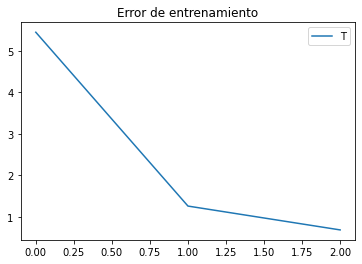

In [16]:
plt.plot(history.history["loss"])
plt.title("Error de entrenamiento")
plt.legend('Train')
plt.show()

In [17]:
results = model.evaluate(test_generator)

print("El modelo logro un error de {} y una accuracy de {}".format(results[0], results[1]))

20/20 [==============================] - 44s 2s/step - loss: 0.4841 - categorical_accuracy: 0.7820
El modelo logro un error de 0.4841068387031555 y una accuracy de 0.7819672226905823


In [19]:
resnet_base = tf.keras.applications.ResNet101(weights='imagenet',
                                       include_top=False,
                                       input_shape=(500, 357, 3),
                                       classes=2)
resnet_base.summary()

171458560/171446536 [==============================] - 2s 0us/step
Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 500, 357, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 506, 363, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 250, 179, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                       

In [21]:
resnet_base.trainable = False

In [23]:
model2 = tf.keras.Sequential()

model2.add(resnet_base)

model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(256, activation='relu'))
model2.add(tf.keras.layers.Dense(2, activation='softmax'))

In [25]:
model2.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),    
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

history = model2.fit(train_generator,
                    epochs=3)

Epoch 1/3
77/77 [==============================] - 176s 2s/step - loss: 51.4749 - categorical_accuracy: 0.5294
Epoch 2/3
77/77 [==============================] - 172s 2s/step - loss: 6.6417 - categorical_accuracy: 0.5335
Epoch 3/3
77/77 [==============================] - 166s 2s/step - loss: 5.0264 - categorical_accuracy: 0.5290


In [28]:
results = model2.evaluate(test_generator)

print("El modelo logro un error de {} y una accuracy de {}".format(results[0], results[1]))

20/20 [==============================] - 44s 2s/step - loss: 1.4510 - categorical_accuracy: 0.6131
El modelo logro un error de 1.450993299484253 y una accuracy de 0.6131147742271423
